In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from datetime import timedelta
from sklearn.linear_model import LinearRegression

In [113]:
def randomsample():
    import random
    # Calculate the date range
    date_min = df['Date'].min()
    date_max = df['Date'].max()

    # Calculate the number of days in the date range
    days_range = (date_max - date_min).days

    # Calculate the number of weeks in the date range
    weeks_range = days_range // 7
    
    # Create an empty DataFrame to store the sampled data
    sample_data = pd.DataFrame(columns=df.columns)

    # Iterate over each week
    for i in range(weeks_range):
        # Generate a random start date within the week
        start_date = date_min + pd.DateOffset(weeks=i)
    
        # Calculate the end date (7 days from the start date)
        end_date = start_date + pd.DateOffset(days=6)
    
        # Filter the DataFrame for the selected week
        week_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
        # Take a random sample from the week's data
        sample_size = min(5, len(week_data))  # Adjust the sample size as desired
        week_sample = week_data.sample(n=sample_size, random_state=42)  # Adjust the random_state as desired
    
        # Append the week's sample to the overall sampled data
        sample_data = sample_data.append(week_sample)

    # Reset the index of the sampled data
    sample_data = sample_data.reset_index(drop=True)
    return sample_data

In [102]:
# Assuming you have a DataFrame named 'df' with 'Text' and 'Date' columns

df = pd.read_csv('TwitterDataSentiments.csv')
# Preprocess the text data if needed
df["Date"] = pd.to_datetime(df["Date"])
# Define a function to calculate sentiment


C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2310547959.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TwitterDataSentiments.csv')


In [103]:

# Define a function to calculate sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [104]:
df = df.sort_values('Date')


In [105]:
#one_week_data = df[df['Date']- >= df['Date'].max() - timedelta(weeks=4)]
four_weeks_data = df['Date'].max() - timedelta(weeks=4)

In [106]:
four_weeks_data

Timestamp('2009-10-08 23:39:00')

In [114]:

# Take a random sample of the data
#random_sample = one_week_data.sample(n=100, random_state=42)  # Adjust the sample size as needed
random_sample = randomsample()


C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\U

C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2760299341.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\U

In [115]:
random_sample

,Unnamed: 0,Date,Text,sentiments
0,861766,2009-01-05 23:00:00,kwame well sure except book belongs ex im not ...,Positive
1,310477,2009-01-06 23:52:00,meganabbott quit cab sad panda,Negative
2,275684,2009-01-06 05:54:00,sharon wish find hot guy u i dunno are,Positive
3,287606,2009-01-06 11:40:00,bella wow reallythats sucky when summer start,Positive
4,308254,2009-01-06 22:36:00,i disappointed conan hes changed lot stuff aud...,Negative
...,...,...,...,...
90,92941,2009-10-05 21:06:00,mileycyrus sssssooooo tired fall asleep movie,Negative
91,92232,2009-10-05 20:16:00,cracked rockstar studying language development...,Netural
92,930264,2009-10-05 21:07:00,baileylou hurry up as soon family guy im walki...,Netural
93,929166,2009-10-05 20:11:00,codyk make make imaginary ffgo join get tweets...,Netural


In [116]:
# Calculate sentiment for the sampled data
sentiment = random_sample['Text'].apply(get_sentiment)
# Create a DataFrame with sentiment and corresponding dates
sentiment_data = pd.DataFrame({
    'Date': random_sample['Date'],
    'Sentiment': sentiment
})

In [118]:

# Sort the DataFrame by date
sentiment_data = sentiment_data.sort_values('Date')

# Create a scatter plot for sentiment over one week
plt.scatter(sentiment_data['Date'], sentiment_data['Sentiment'], color='blue')

# Calculate the best fit line
x = np.array(range(len(sentiment_data)))
x = x.reshape(-1, 1)
y = sentiment_data['Sentiment'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

# Plot the best fit line
plt.plot(sentiment_data['Date'], y_pred, color='red', linestyle='--')


plt.ylabel('Sentiment')
plt.title('Sentiment Over four Week with Best Fit Line')
plt.xticks(rotation=45)
plt.show()


AttributeError: 'Series' object has no attribute 'random'

In [27]:
import pandas as pd
import random

# Assuming you have a DataFrame named 'df' with a 'Date' column

# Calculate the date range
date_min = df['Date'].min()
date_max = df['Date'].max()

# Calculate the number of days in the date range
days_range = (date_max - date_min).days

# Calculate the number of weeks in the date range
weeks_range = days_range // 7

# Generate a random start date within the date range
start_date = date_min + pd.DateOffset(days=random.randint(0, days_range-28))

# Calculate the end date (4 weeks from the start date)
end_date = start_date + pd.DateOffset(weeks=4)

# Filter the DataFrame for the selected date range
sample_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


In [28]:
sample_data

,Unnamed: 0,Date,Text,sentiments
44862,44862,2009-02-05 00:00:00,the new update geodefence install beta iphone buh,Positive
44863,44863,2009-02-05 00:00:00,serlina made eat unnecessary calories,Negative
44883,44883,2009-02-05 00:00:00,theblackwreath i dunno happens sometimes i ove...,Positive
44882,44882,2009-02-05 00:00:00,geniusinalamp baaaabe im sorry lastt night pho...,Positive
44881,44881,2009-02-05 00:00:00,finally got shack burger delicious i remembere...,Positive
...,...,...,...,...
336141,336141,2009-02-06 23:59:00,flowers yesterdays accident spot peckham can r...,Negative
336146,336146,2009-02-06 23:59:00,haha i growled dog tilted head gave wtf wrong ...,Negative
336143,336143,2009-02-06 23:59:00,morning all im work bit love brandystrippers c...,Positive
336144,336144,2009-02-06 23:59:00,ekzmn hi ely i hope la,Netural


In [51]:
import pandas as pd
import random

# Assuming you have a DataFrame named 'df' with a 'Date' column

# Calculate the date range
date_min = df['Date'].min()
date_max = df['Date'].max()

# Calculate the number of days in the date range
days_range = (date_max - date_min).days

# Calculate the number of weeks in the date range
weeks_range = days_range // 7

# Create an empty DataFrame to store the sampled data
sample_data = pd.DataFrame(columns=df.columns)

# Iterate over each week
for i in range(weeks_range):
    # Generate a random start date within the week
    start_date = date_min + pd.DateOffset(weeks=i)
    
    # Calculate the end date (7 days from the start date)
    end_date = start_date + pd.DateOffset(days=6)
    
    # Filter the DataFrame for the selected week
    week_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    # Take a random sample from the week's data
    sample_size = min(5, len(week_data))  # Adjust the sample size as desired
    week_sample = week_data.sample(n=sample_size, random_state=42)  # Adjust the random_state as desired
    
    # Append the week's sample to the overall sampled data
    sample_data = sample_data.append(week_sample)

# Reset the index of the sampled data
sample_data = sample_data.reset_index(drop=True)
sample_data

C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users

C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\584101378.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_data = sample_data.append(week_sample)
C:\Users

,Unnamed: 0,Date,Text,sentiments
0,861766,2009-01-05 23:00:00,kwame well sure except book belongs ex im not ...,Positive
1,310477,2009-01-06 23:52:00,meganabbott quit cab sad panda,Negative
2,275684,2009-01-06 05:54:00,sharon wish find hot guy u i dunno are,Positive
3,287606,2009-01-06 11:40:00,bella wow reallythats sucky when summer start,Positive
4,308254,2009-01-06 22:36:00,i disappointed conan hes changed lot stuff aud...,Negative
...,...,...,...,...
90,92941,2009-10-05 21:06:00,mileycyrus sssssooooo tired fall asleep movie,Negative
91,92232,2009-10-05 20:16:00,cracked rockstar studying language development...,Netural
92,930264,2009-10-05 21:07:00,baileylou hurry up as soon family guy im walki...,Netural
93,929166,2009-10-05 20:11:00,codyk make make imaginary ffgo join get tweets...,Netural


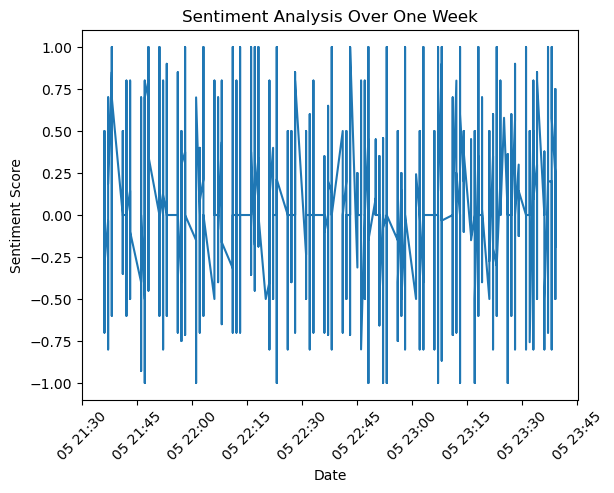

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import timedelta

# Assuming you have a DataFrame named 'df' with a 'Text' column and a 'Date' column indicating the date of each text

# Filter the DataFrame for one week
one_week_data = df[df['Date'] >= df['Date'].max() - timedelta(weeks=1)]

# Perform sentiment analysis
sentiment_scores = one_week_data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the sentiment scores
plt.plot(one_week_data['Date'], sentiment_scores)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Over One Week')
plt.xticks(rotation=45)
plt.show()


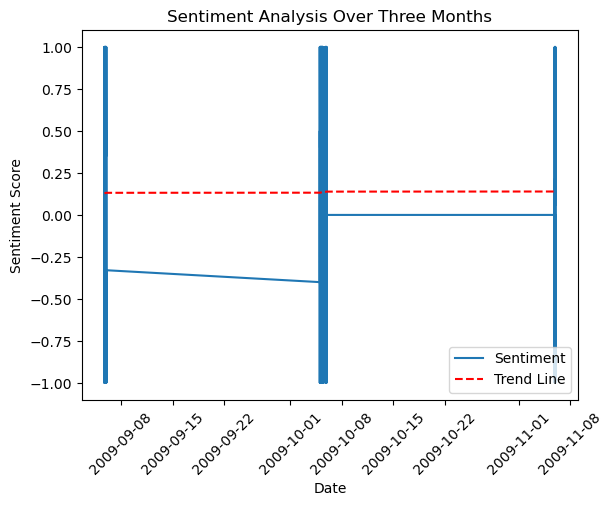

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import timedelta

# Assuming you have a DataFrame named 'df' with a 'Text' column and a 'Date' column indicating the date of each text

# Filter the DataFrame for one month
one_month_data = df[df['Date'] >= df['Date'].max() - timedelta(weeks=4)]

# Perform sentiment analysis
sentiment_scores = one_month_data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Calculate the best fit line
x = np.array(range(len(sentiment_data)))
x = x.reshape(-1, 1)
y = sentiment_data['Sentiment'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

# Visualize the sentiment scores with trend line
plt.plot(sentiment_data['Date'], sentiment_data['Sentiment'], label='Sentiment')
plt.plot(sentiment_data['Date'], y_pred, label='Trend Line', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Over Three Months')
plt.xticks(rotation=45)
plt.legend()
plt.show()


C:\Users\Daniel\AppData\Local\Temp\ipykernel_5736\2765847572.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_months_data['Text'] = three_months_data['Text'].astype(str)


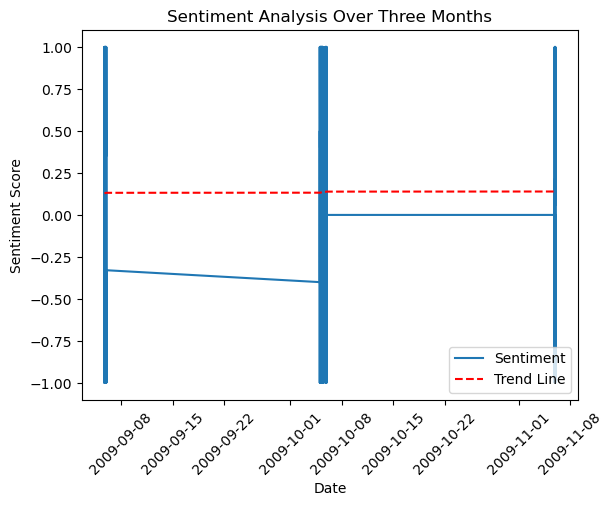

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import timedelta

# Assuming you have a DataFrame named 'df' with a 'Text' column and a 'Date' column indicating the date of each text

# Filter the DataFrame for three months
three_months_data = df[df['Date'] >= df['Date'].max() - timedelta(weeks=12)]

# Convert 'Text' column to string
three_months_data['Text'] = three_months_data['Text'].astype(str)

# Perform sentiment analysis
sentiment_scores = three_months_data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Create a DataFrame with date and sentiment scores
sentiment_data = pd.DataFrame({
    'Date': three_months_data['Date'],
    'Sentiment': sentiment_scores
})

# Sort the DataFrame by date
sentiment_data = sentiment_data.sort_values('Date')

# Calculate the best fit line
x = np.array(range(len(sentiment_data)))
x = x.reshape(-1, 1)
y = sentiment_data['Sentiment'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

# Visualize the sentiment scores with trend line
plt.plot(sentiment_data['Date'], sentiment_data['Sentiment'], label='Sentiment')
plt.plot(sentiment_data['Date'], y_pred, label='Trend Line', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Over Three Months')
plt.xticks(rotation=45)
plt.legend()
plt.show()